<a href="https://complexity-in-action.github.io/"><img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/CARL_logo.jpg" width=200></a>

# 1. Sarsa Algorithm and the Windy Grid World Enviroment

__In this notebook, we are going to tackle the [Windy Grid World](#What-is-the-Windy-Grid-World-Environment?) and the [Taxi environment](#2.-Sarsa-Algorithm-and-the-Taxi-Environment) with the Sarsa algorithm. Once we implement Sarsa, implementing Q-Learning and many others would be easy. We usually need to change the core update method.__

## What is the Windy Grid World Environment?
Windy Gridworld as shown below is a standard gridworld, with start and goal states, but with one difference: there is a crosswind running upward through the middle of the grid. The actions are the standard four—up, down, right, and left—but in the middle region the resultant next states are shifted upward by a “wind,” the strength of which varies from column to column. The strength of the wind is given below each column, in number of cells shifted upward. For example, if you are one cell to the right of the goal, then the action left takes you to the cell just above the goal. The optimal path should look like this. ([Sutton, 2018](http://www.incompleteideas.net/book/the-book-2nd.html)) (Why?)

<img style="align: center;" src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/windygrid_actual.png" width=400>
<table style="background-color: white; align: center; text-align: center;">
    <tr>
        <td style="text-align: center;">
            <h3>Start State</h3>
        </td>
        <td>
        </td>
        <td style="text-align: center;">
            <h3>Final State</h3>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/Windy_grid_world.png" width=300>
        </td>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/arrow.jpeg" width=20>
        </td>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/Windy_grid_world_end.png" width=300>
        </td>
    </tr>
</table>

----

In [1]:
# PLEASE RUN ME!
# INSTALLATIONS
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.done'):
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/python_Exercise/master/Colab_setup/setup_colab.sh -O- | bash
    !pip -q install gym tensorflow==2.3.0 tensorflow_probability tqdm
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRLIntro/main/Sarsa/agents.py
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRLIntro/main/Sarsa/envs.py
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRLIntro/main/Sarsa/train.py
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRLIntro/main/Sarsa/Taxi_brain.pkl
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRLIntro/main/Sarsa/brain_CartPole-v1.h5
    !touch .done

# Creating a virtual display to draw game images on.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

## Let's see how a random agent acts (50 random steps)

(5, -1, False)


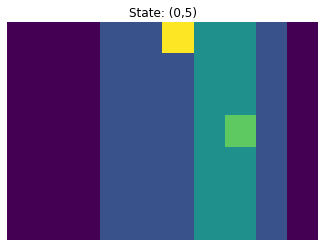

In [1]:
from envs import WindyGridWorld
from time import sleep
import numpy as np
from IPython.display import clear_output

%matplotlib inline
env = WindyGridWorld()

for i in range(50):
    a = np.random.choice([0,1,2,3])
    print(env.step(a))
    env.render()
    sleep(0.1)
    clear_output(wait=True)

## Training a Sarsa Agent for the Windy Grid World

<img style="align: center;" src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/SARSA_algorithm.png" width=800>

__Notice that as the training progresses, the agent gets less negative reward, and manages to finish the task sooner.__

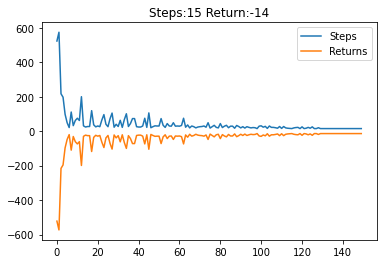

In [3]:
from envs import WindyGridWorld
from agents import Sarsa_Agent
from train import train_windygridworld, play

env = WindyGridWorld()
agent = Sarsa_Agent(env.states_n, env.actions_n,epsilon_decay=True)

train_windygridworld(env, agent, 150)

Pay attention to the fact that as the learning progresses the agent collects more rewards (returns) in a shorter period (less steps).

## Watch a Smart Agent:

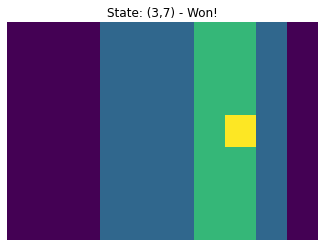

Done in 15 steps.
Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 0]
right, right, right, right, right, right, right, right, right, down, down, down, down, left, left, right, 


In [4]:
play(env, agent, episodes=2)

# How the learning happened?

The Sarsa agent is implementing a __tabular method__ which means that it's updating a table of values iteratively. This table is called Q-table. After the training the agent knows exactly which actions are the best in almost all possible states.

In __Deep Reinforcement Learning__, this table is replaced by a [neural network](https://www.nature.com/articles/nature14236). A well-designed network can learn much more complex tasks, generalizes, and thus responds better to unseen situations.

__Take a look at the Pigoen Pong Experiment__: Artificial agents follow the same process. __We'll show an agent with neural network for Pole Balancing task later.__

In [2]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/vGazyH6fQQ4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Here's its Q-table:

In [5]:
agent.Q

array([[ -9.55656703,  -9.61712999,  -9.75694056,  -9.45879318],
       [ -9.33180113,  -9.51787127,  -9.41797374,  -9.5223588 ],
       [ -9.1114673 ,  -9.04386215,  -9.19346387,  -9.13074256],
       [ -8.61917521,  -8.67145313,  -8.95738678,  -8.72841416],
       [ -8.02526051,  -8.35644573,  -8.14722066,  -8.22223289],
       [ -7.39501181,  -7.51093949,  -7.81425978,  -7.71402981],
       [ -6.73159137,  -6.87811086,  -7.0592546 ,  -6.93443828],
       [ -6.03325408,  -6.58078786,  -6.31274964,  -6.38137929],
       [ -5.29816219,  -6.01541501,  -5.804668  ,  -5.88175233],
       [ -4.83193143,  -4.75677615,  -4.95260987,  -4.52438125],
       [ -9.62858665,  -9.56371318,  -9.56559527,  -9.70303172],
       [ -9.47638142,  -9.51956932,  -9.45454191,  -9.68222315],
       [ -9.12378606,  -9.10331434,  -9.14724146,  -9.19255356],
       [ -8.61584842,  -8.87336493,  -8.67934209,  -8.93955175],
       [ -8.02520608,  -8.06611783,  -8.15346911,  -8.03165332],
       [ -7.39501181,  -7

# 2. Sarsa Algorithm and the Taxi Environment

The Smartcab's job is to pick up the passenger in a simplified gridworld like environment at one location and drop them off in another ([Taxi, OpenAI Gym](https://gym.openai.com/envs/Taxi-v2/)). Here are a few things that we'd love our Smartcab to take care of:

- Drop off the passenger to the right location.
- Save passenger's time by taking minimum time possible to drop off
- Take care of passenger's safety and traffic rules

<img style="align: center;" src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/Taxi_Env.png" width=400>

__State__: Let's say we have a training area for our Smartcab where we are teaching it to transport people in a parking lot to four different locations (R, G, Y, B):

Let's assume Smartcab is the only vehicle in this parking lot. We can break up the parking lot into a 5x5 grid, which gives us 25 possible taxi locations. These 25 locations are one part of our state space. Notice the current location state of our taxi is coordinate (3, 1).

You'll also notice there are four (4) locations that we can pick up and drop off a passenger: R, G, Y, B or `[(0,0), (0,4), (4,0), (4,3)]` in (row, col) coordinates. Our illustrated passenger is in location Y and they wish to go to location R.

__Actions__: The agent is allowed to perform six possible actions:

1. south
2. north
3. east
4. west
5. pickup
6. dropoff

Notice in the illustration above, that the taxi cannot perform certain actions in certain states due to walls. In environment's code, we will simply provide a -1 penalty for every wall hit and the taxi won't move anywhere. This will just rack up penalties causing the taxi to consider going around the wall.

## Let's train our agent for 1500 episodes (takes ~5 minutes)
### _Or alternatively, you can load an already trained agent and see its performance. For that, go to the next cell._

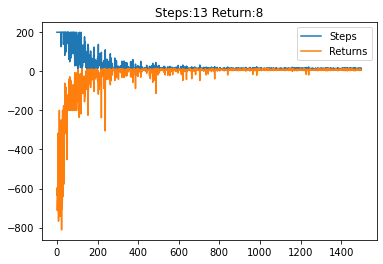

In [2]:
import gym
from agents import Sarsa_Agent
from train import train_gym, play_taxi

# Finding the Taxi environment
for env in gym.envs.registry.all():
    if env.id.startswith("Taxi"):
        env_name = env.id
##

env = gym.make(env_name)
agent = Sarsa_Agent(env.observation_space.n, env.action_space.n,epsilon_decay=True)

train_gym(env, agent, 1500)

## Uncomment if you want to save your trained agent
# agent.save(file_name="Taxi_brain.pkl")

Pay attention to the fact that as the learning progresses the agent collects more rewards (returns) in a shorter period (less steps).

## Run the cell bellow if you want to load an already trained agent:
Note: If you run this after training your agent, it simply overrides your training.

In [1]:
import gym
from agents import Sarsa_Agent
from train import train_gym, play_taxi

# Finding the Taxi environment
for env in gym.envs.registry.all():
    if env.id.startswith("Taxi"):
        env_name = env.id
##

env = gym.make(env_name)
agent = Sarsa_Agent(env.observation_space.n, env.action_space.n,epsilon_decay=True)
agent.load(file_name="Taxi_brain.pkl")

## Watch a smart self-driving cab:
Note: You can change the number of `passengers` if you want to move more than 3. Change the `wait_btw_frames` if you want to see the game running faster or slower.

In [2]:
play_taxi(env, agent, passengers=3, wait_btw_frames=1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Passenger #: 3
-----------
Timestep: 14
State: 479
Action: 5
Reward: 20


# Testing an Agent with Neural Network on Pole Balancing:

Pole balancing is a classic control problem, historically used in engineering. It involves a pole affixed to a cart via a joint which allows movement along a single axis. The cart is able to move along a track of fixed length.

<img src="https://github.com/FredAmouzgar/DeepRLIntro/raw/main/images/polebalance.gif" width=400>

In control engineering, we explicitly design a dynamical system to do this. We did the same thing with __Deep Reinforcement Learning without knowing the mathematical details (as it happens in nature)__. We trained it with an __Actor-Critic algorithm using a small Artificial Neural Network__. It takes some time to train it, so we provided the "brain" of our trained agent. You can test it and see how it performs.
<img src="https://github.com/FredAmouzgar/DeepRLIntro/raw/main/images/drl.jpg" width=600>

### Let's load an untraind agent and see its performace

In [1]:
from agents import Deep_Agent
from train import play_gym
import gym

%matplotlib inline


env = gym.make("CartPole-v1")
agent = Deep_Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, env_name=env.spec.id)

play_gym(env, agent, episodes=2)
env.close()

100%|██████████| 2/2 [00:04<00:00,  2.04s/it]


### Let's load its brain (much better)

In [2]:
env = gym.make("CartPole-v1")
agent = Deep_Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, env_name=env.spec.id)
agent.load(src="brain_CartPole-v1.h5")

play_gym(env, agent, episodes=2)
env.close()

100%|██████████| 2/2 [01:41<00:00, 50.98s/it]


### Robotic Pole Balancing:
We can __transfer this brain to a robotic arm__ (simulation training is way cheaper than training a real robot), or we can __directly apply the RL algorithm to a physical robot__ for learning as it's illustrated in the experiment below.

#### Checkout the Robotic Pole Balancing:

In [3]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/5Q14EjnOJZc?start=9&end=140" frameborder="0" allow="mute; accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
# De-INSTALLATIONS
import sys, os
if 'google.colab' in sys.modules and os.path.exists('.done'):
    !rm agents.py envs.py train.py brain_CartPole-v1.h5 .done

## Conclusion:

Reinforcement algorithms are the closest approaches to __General Intelligence__. Notice that we used the same algorithm on two completely different environments, and in both an optimal solution converged.

<p style="font-size:7px">&copy; <a href="https://www.linkedin.com/in/fredamouzgar/">F.A</a>, Oct 2020</p>